In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load 
city_data_to_load = os.path.join("data", "city_data.csv")
ride_data_to_load = os.path.join("data", "ride_data.csv")

# Read the City and Ride Data
citi_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
citi_df = citi_df.drop_duplicates('city', keep = 'first')
merged_df = citi_df.merge(ride_df, on = 'city', how = 'left')
merged_df = merged_df.rename(columns = {'type': 'city_type'})
# Display the data table for preview
merged_df.head()

,city,driver_count,city_type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
groupby_city = merged_df.groupby(['city_type','city'])
cityfare = pd.DataFrame({'totalrides': groupby_city.ride_id.count(),
                         'avg_fare': groupby_city.fare.mean(),
                         'driver_count': groupby_city.driver_count.mean()
                        })
cityfare.head()

totalrides   avg_fare  driver_count
city_type city                                               
Rural     Bradshawfurt            10  40.064000             7
          Garzaport                3  24.123333             7
          Harringtonfort           6  33.470000             4
          Jessicaport              6  36.013333             1
          Lake Jamie               6  34.358333             4

In [3]:
cityfaredf = cityfare.reset_index()
cityfaredf
rural = cityfaredf[cityfaredf['city_type'] == 'Rural']
suburban = cityfaredf[cityfaredf['city_type'] == 'Suburban']
urban = cityfaredf[cityfaredf['city_type'] == 'Urban']

In [4]:
color_scheme = {'Gold': '#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

In [5]:
city_color = {'Urban': color_scheme['Gold'], 
              'Suburban': color_scheme['Light Sky Blue'],
              'Rural': color_scheme['Light Coral']}

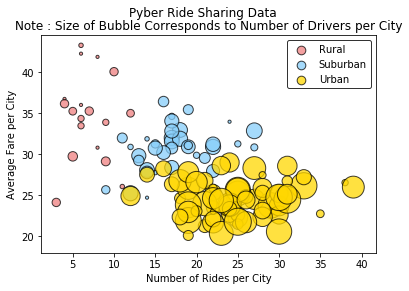

In [9]:
plt.suptitle('Pyber Ride Sharing Data')
# three scatter plots for each city type
rural['avg_fare']
plt.scatter(rural['totalrides'], rural['avg_fare'], s=rural['driver_count']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['totalrides'], suburban['avg_fare'], s = suburban['driver_count']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['totalrides'], urban['avg_fare'], s = urban['driver_count']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

# #print scatter plot
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

## Bubble Plot of Ride Sharing Data

In [ ]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


## Total Fares by City Type

In [1]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure

#group by type to be used by all pie charts
by_type = merged_df.groupby('city_type')['city_type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#pie chart build
labels = fare_sum.index

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

NameError: name 'merged_df' is not defined

## Total Rides by City Type

In [2]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

NameError: name 'by_type' is not defined

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure
driver_sum = by_type.sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()